In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder 
import math
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split


In [21]:
#zaczytanie danych z pliku
df_train = pd.read_csv("train.csv" , sep = "," , encoding = 'utf-8')
#sprawdzenie rozmiaru
print(df_train.shape)
#sprawdzenie nazw kolumn i ich typów
print(df_train.info())
#wyświetl część tabeli
df_train.head()
#usunięcie wierszy z duplikatami id
df_train.drop_duplicates(subset="ID", inplace=True) 

C:\Users\paula\AppData\Local\Temp\ipykernel_4448\814453794.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("train.csv" , sep = "," , encoding = 'utf-8')


(100000, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 

In [22]:
#nazwy kolumn dla danych docelowo numerycznych
FeaturesToConvert = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment',
                    'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly',
                    'Monthly_Balance']


<AxesSubplot: ylabel='count'>

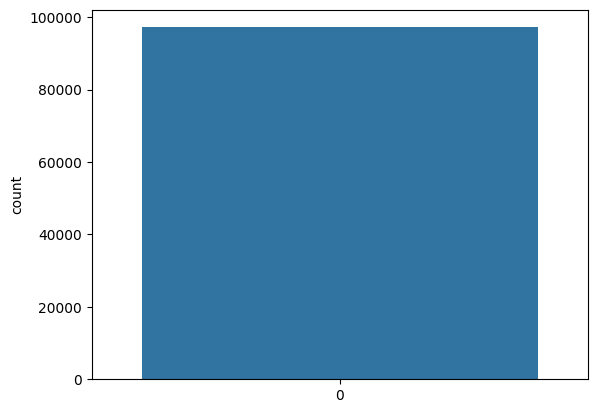

In [43]:
#nazwy kolumn dla danych kategorycznych 

# liczności danych kategorii

sns.countplot(df_train['Credit_Score'])


In [24]:
#sprawdzenie danych
for i in df_train.columns: 
	print(df_train[i].value_counts()) 
	print('*'*50)
 

0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: ID, Length: 100000, dtype: int64
**************************************************
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: Customer_ID, Length: 12500, dtype: int64
**************************************************
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64
**************************************************
Langep            44
Stevex            44
Vaughanl          39
Jessicad          39
Raymondr          38
                  ..
Alina Selyukhg     4
Habboushg          4
Mortimerq          4
Ronaldf            4
Timothyl           3
Name: Name, Length: 10139, dtype: int64
*

In [25]:
# wyświetl liczbę pustych wartosci
print(df_train.isnull().sum().sort_values(ascending=False))


Monthly_Inhand_Salary       15002
Type_of_Loan                11408
Name                         9985
Credit_History_Age           9030
Num_of_Delayed_Payment       7002
Amount_invested_monthly      4479
Num_Credit_Inquiries         1965
Monthly_Balance              1200
ID                              0
Changed_Credit_Limit            0
Payment_Behaviour               0
Total_EMI_per_month             0
Payment_of_Min_Amount           0
Credit_Utilization_Ratio        0
Outstanding_Debt                0
Credit_Mix                      0
Delay_from_due_date             0
Customer_ID                     0
Num_of_Loan                     0
Interest_Rate                   0
Num_Credit_Card                 0
Num_Bank_Accounts               0
Annual_Income                   0
Occupation                      0
SSN                             0
Age                             0
Month                           0
Credit_Score                    0
dtype: int64


In [26]:
######### dane numeryczne #########################
# usuń zbędne znaki '-’ , '_'
for feature in FeaturesToConvert: 
	df_train[feature] = df_train[feature].str.strip('-_')
# puste kolumny zastąp NAN 
for feature in FeaturesToConvert: 
	df_train[feature] = df_train[feature].replace({'':np.nan}) 
# zmien typ zmiennych ilościowych
for feature in FeaturesToConvert: 
	df_train[feature] = df_train[feature].astype('float64')

In [27]:
#uzupełnij braki średnią
df_train['Monthly_Inhand_Salary']= df_train['Monthly_Inhand_Salary'].fillna(method='pad')
df_train['Monthly_Balance']= df_train['Monthly_Balance'].fillna(method='pad')
df_train['Type_of_Loan']= df_train['Type_of_Loan'].fillna(method='ffill')
#df_train['Credit_History_Age']= df_train['Credit_History_Age'].fillna(method='pad')
df_train['Num_of_Delayed_Payment']= df_train['Num_of_Delayed_Payment'].fillna(method='pad')
df_train['Amount_invested_monthly']= df_train['Amount_invested_monthly'].fillna(method='pad')
df_train['Changed_Credit_Limit']= df_train['Changed_Credit_Limit'].fillna(method='pad')
df_train['Num_Credit_Inquiries']= df_train['Num_Credit_Inquiries'].fillna(method='pad')

In [28]:

print(df_train.isnull().sum().sort_values(ascending=False))


Name                        9985
Credit_History_Age          9030
ID                             0
Num_of_Delayed_Payment         0
Monthly_Balance                0
Payment_Behaviour              0
Amount_invested_monthly        0
Total_EMI_per_month            0
Payment_of_Min_Amount          0
Credit_Utilization_Ratio       0
Outstanding_Debt               0
Credit_Mix                     0
Num_Credit_Inquiries           0
Changed_Credit_Limit           0
Delay_from_due_date            0
Customer_ID                    0
Type_of_Loan                   0
Num_of_Loan                    0
Interest_Rate                  0
Num_Credit_Card                0
Num_Bank_Accounts              0
Monthly_Inhand_Salary          0
Annual_Income                  0
Occupation                     0
SSN                            0
Age                            0
Month                          0
Credit_Score                   0
dtype: int64


In [29]:
#zastąpienie nierealnych wartości medianą
for i in df_train.Age.values:
    if (i > 118 or i< 0 ):
        df_train.Age.replace(i, np.median(df_train.Age), inplace=True)
        

In [30]:
############ zmienne kategoryczne #####################
# stwórz obiekt enkodera
le = LabelEncoder()

CatFeatures = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
               'Payment_Behaviour', 'Credit_Score']


In [31]:
# zakoduj etykiety słowne numerycznymi

df_train[CatFeatures] = df_train[CatFeatures].apply(LabelEncoder().fit_transform)

In [32]:
# usuń nieistotne kolumny
irrelevant = ['ID','Customer_ID','Name','SSN']
df_train = df_train.drop(irrelevant, axis=1)

len(df_train)
# usuwanie nieistotnych kolumn


# usunięcie nadwiekowych osób
for i in df_train.Age.values:
    if (i > 118 or i< 0 ):
        df_train.Age.replace(i, np.median(df_train.Age), inplace=True)

In [33]:
######################################################
# sprawdź transformacje
print(df_train.shape)
print('\n**********************************\n')
print(df_train.info())
print('\n**********************************\n')
print(df_train.describe().transpose())
print('\n**********************************\n')
######################################################


(100000, 24)

**********************************

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  int32  
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  float64
 9   Type_of_Loan              100000 non-null  object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    100000 non-null  float64
 12  Changed_Credit_Limit      100000 non-null  float64


In [34]:

#Kłopotliwe 'Credit_History_Age’
df_train['Credit_History_Age'].head()
# podziel kolumnę po tekście i przelicz na
# miesiące
df_train['Credit_History_Age']=(12*df_train["Credit_History_Age"].str.split( " ", expand=True )[0].astype(float)
+df_train["Credit_History_Age"].str.split( " ", expand=True )[3].astype(float))
df_train['Credit_History_Age']= df_train['Credit_History_Age'].astype(float)
df_train['Credit_History_Age'].head()

0    265.0
1      NaN
2    267.0
3    268.0
4    269.0
Name: Credit_History_Age, dtype: float64

In [35]:
# Drop outlier by IQR calculation



Q1 = df_train.Annual_Income.quantile(0.25)
Q3 = df_train.Annual_Income.quantile(0.75)
IQR = Q3 - Q1
df_train = df_train.drop(df_train.loc[df_train['Annual_Income'] > (Q3 + 1.5 *
IQR)].index)
df_train = df_train.drop(df_train.loc[df_train['Annual_Income'] < (Q1 -
1.5 * IQR)].index)

In [37]:
# Standaryzacja i normalizacja zmiennych numerycznych
scaler = StandardScaler() # scaler = StandardScaler()MinMaxScaler

col_float = ['Age', 'Annual_Income', 'Delay_from_due_date',
'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Credit_History_Age',
'Total_EMI_per_month', 'Monthly_Balance']

for i in df_train[col_float]:
    df_train[i] = scaler.fit_transform(df_train[[i]])

print(df_train.head())

      Month       Age  Occupation  Annual_Income  Monthly_Inhand_Salary  \
0   January -0.969011          12      -0.831569            1824.843333   
1  February -0.969011          12      -0.831569            1824.843333   
2     March  0.064971          12      -0.831569            1824.843333   
3     April -0.969011          12      -0.831569            1824.843333   
4       May -0.969011          12      -0.831569            1824.843333   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                  3                4              3          4.0   
1                  3                4              3          4.0   
2                  3                4              3          4.0   
3                  3                4              3          4.0   
4                  3                4              3          4.0   

                                        Type_of_Loan  ...  Credit_Mix  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...  ...    

C:\Users\paula\AppData\Local\Temp\ipykernel_4448\3707668717.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), annot =


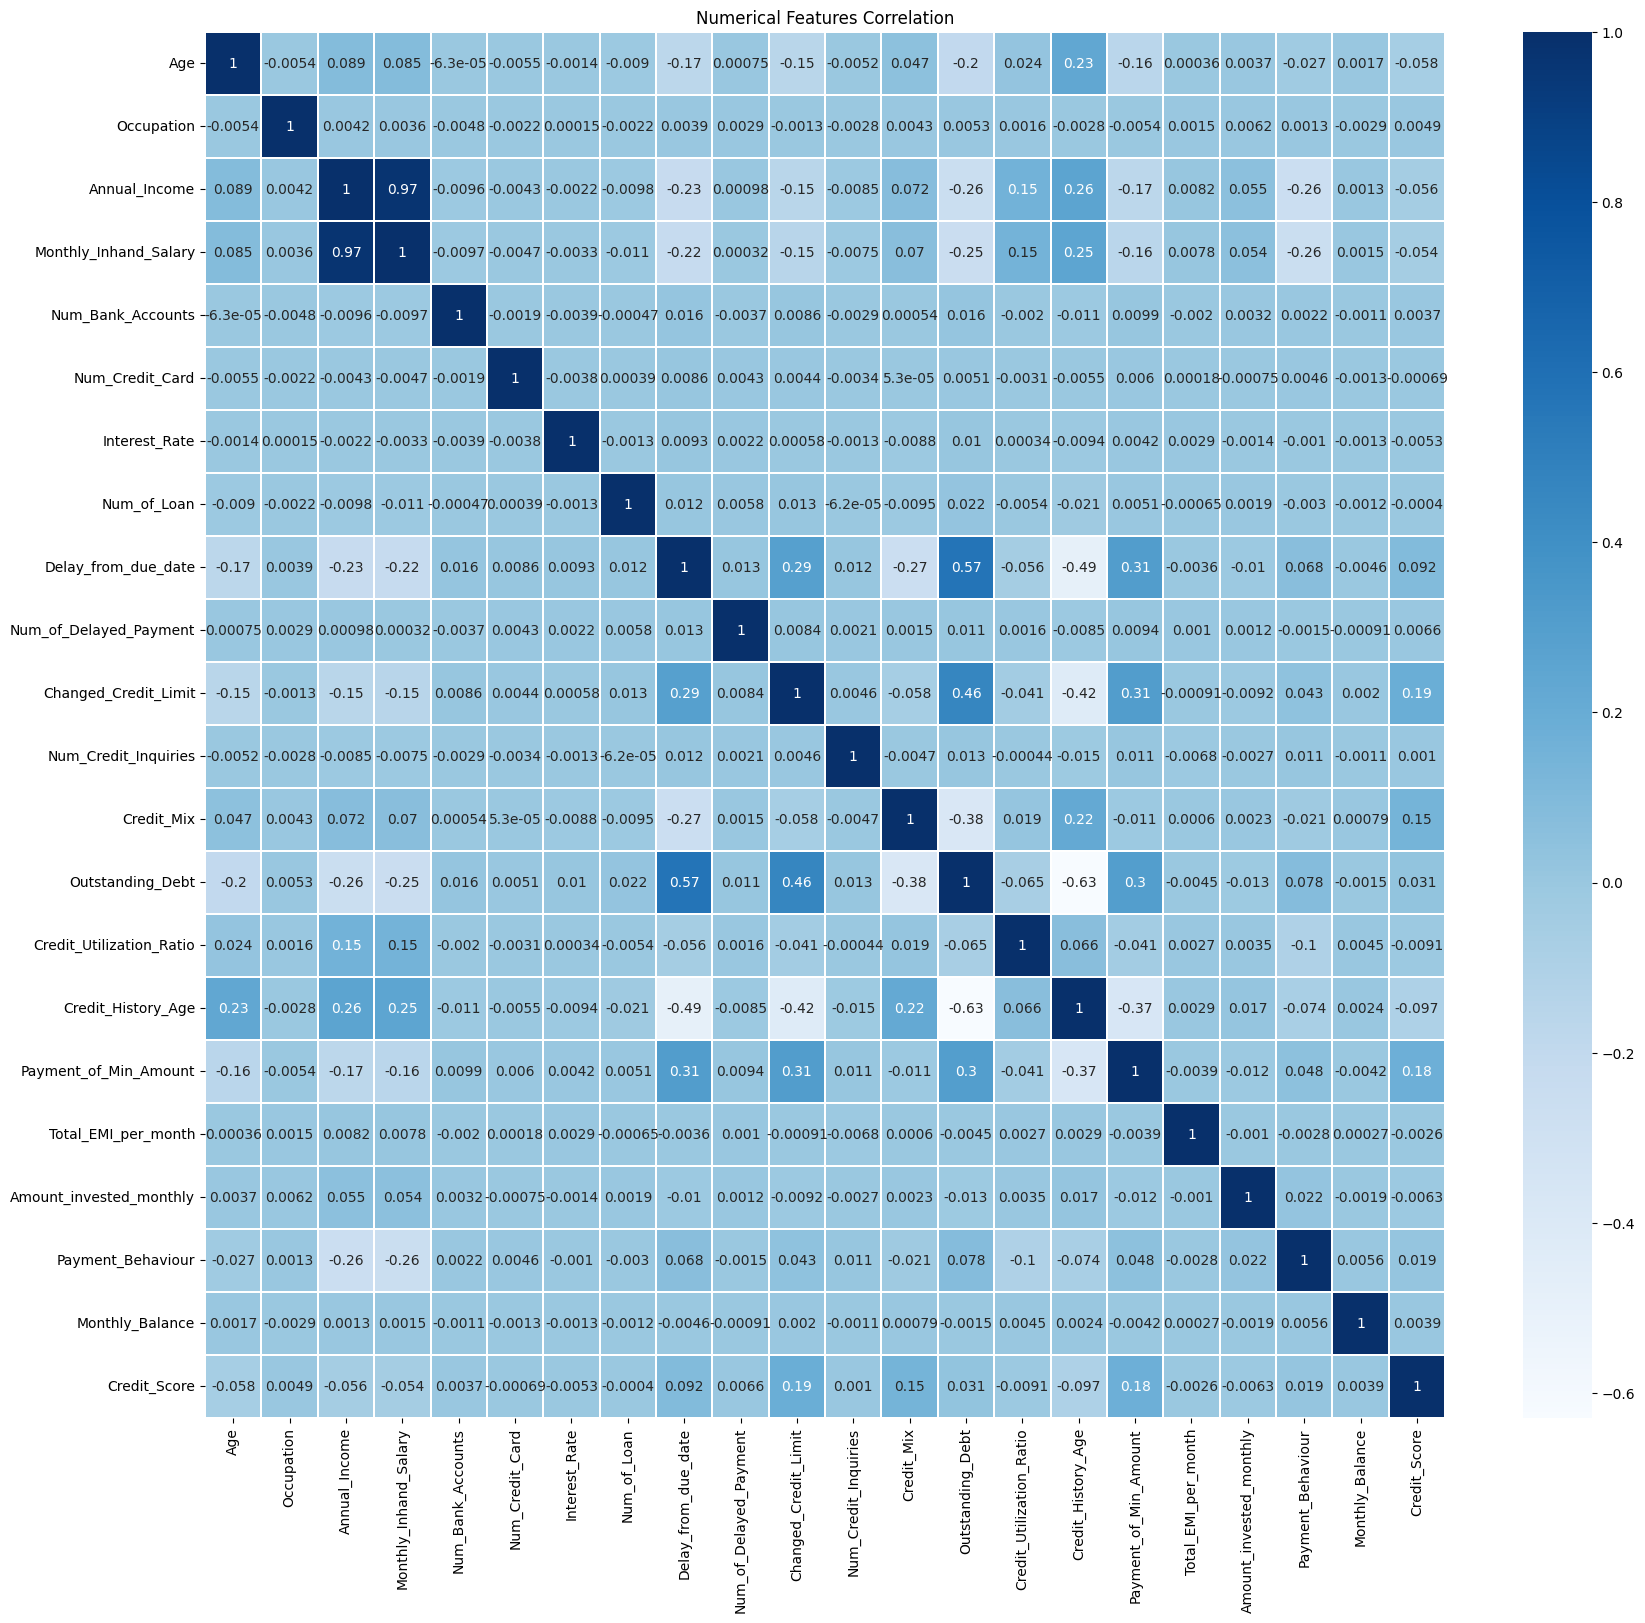

In [38]:
# Korelacje cech numerycznych
features = ['Annual_Income', 'Age', 'Monthly_Inhand_Salary', 'Credit_History_Age', 'Month', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Outstanding_Debt', 'Credit_Utilization_Ratio' ]

plt.figure(figsize = (20, 18))
sns.heatmap(df_train.corr(), annot =
True, linewidths = 0.1, cmap = 'Blues')
plt.title('Numerical Features Correlation')
plt.show()

C:\Users\paula\AppData\Local\Temp\ipykernel_4448\472435684.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.DataFrame(abs(df_train.corr()['Credit_Score'].drop('Credit_Score')*100).sort_values(ascending=False)).plot.bar(figsize = (10,8))


<AxesSubplot: >

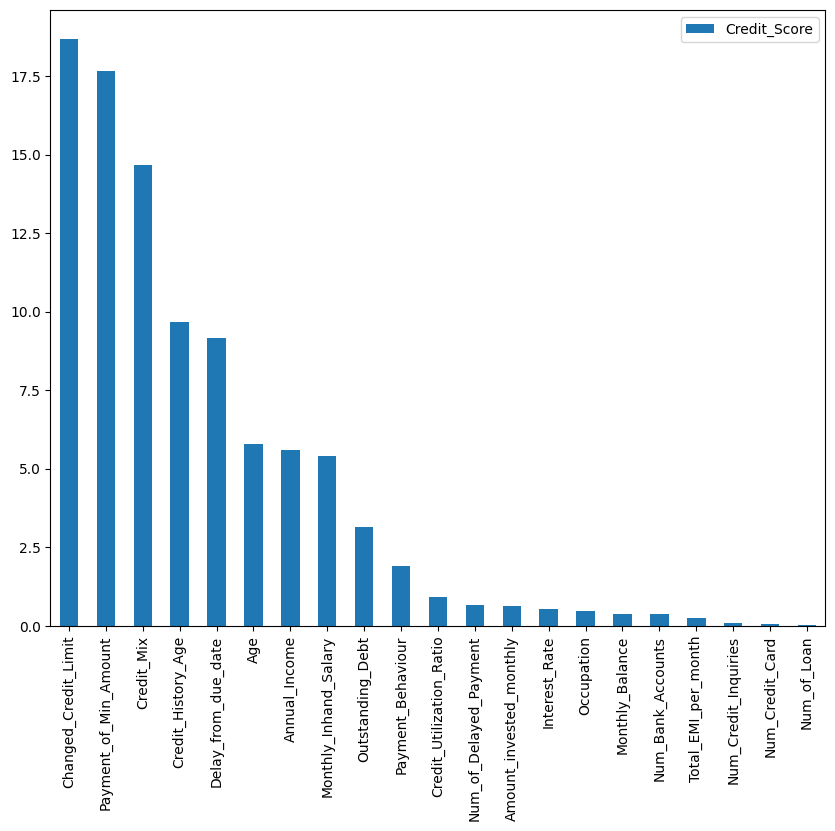

In [39]:
# Ranking

pd.DataFrame(abs(df_train.corr()['Credit_Score'].drop('Credit_Score')*100).sort_values(ascending=False)).plot.bar(figsize = (10,8))

In [41]:
# Usuwanie Num_Credit_Card, Credit_Utilization_Ratio, Monthly_Inhand_Salary

setOne = df_train.drop(['Num_Credit_Card', 'Credit_Utilization_Ratio', 'Monthly_Inhand_Salary'], axis=1)

In [42]:
setOne

,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,-0.969011,12,-0.831569,3,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.229299,-0.106104,...,4.0,3,-0.542185,0.452218,1,-0.162772,80.415295,3,-0.009622,0
1,February,-0.969011,12,-0.831569,3,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.498070,-0.106104,...,4.0,1,-0.542185,NaN,1,-0.162772,118.280222,4,-0.009622,0
2,March,0.064971,12,-0.831569,3,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.229299,-0.106104,...,4.0,1,-0.542185,0.472265,1,-0.162772,81.699521,5,-0.009622,0
3,April,-0.969011,12,-0.831569,3,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.094913,-0.119436,...,4.0,1,-0.542185,0.482288,1,-0.162772,199.458074,6,-0.009622,0
4,May,-0.969011,12,-0.831569,3,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.027720,-0.119436,...,4.0,1,-0.542185,0.492312,1,-0.162772,41.420153,2,-0.009622,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,April,-0.781014,9,-0.247987,4,7,2.0,"Auto Loan, and Student Loan",0.114561,-0.106104,...,3.0,3,-0.807420,1.584867,1,-0.164517,60.971333,1,-0.009622,1
99996,May,-0.781014,9,-0.247987,4,7,2.0,"Auto Loan, and Student Loan",-0.221404,-0.106104,...,3.0,3,-0.807420,1.594891,1,-0.164517,54.185950,2,-0.009622,1
99997,June,-0.781014,9,-0.247987,4,5729,2.0,"Auto Loan, and Student Loan",0.383332,-0.110548,...,3.0,1,-0.807420,1.604914,1,-0.164517,24.028477,1,-0.009622,1
99998,July,-0.781014,9,-0.247987,4,7,2.0,"Auto Loan, and Student Loan",-0.087018,-0.110548,...,3.0,1,-0.807420,1.614938,1,-0.164517,251.672582,4,-0.009622,2
